<a href="https://colab.research.google.com/github/Aditya-y9/StockMarketML/blob/main/StockMarketML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Predictor (Advanced)

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [184]:
# website used to
!pip install quandl
import quandl

In [186]:
stock = yf.Ticker("HINDUNILVR.NS")

Stock prices are time-series data (with time the data variable is changing)

In [187]:
history = stock.history(period="max")

In [188]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,34.911098,35.121575,34.689396,34.689396,11000,0.0,0.0
1996-01-02 00:00:00+05:30,34.689394,35.191733,34.700620,35.059834,203500,0.0,0.0
1996-01-03 00:00:00+05:30,35.059824,34.995276,34.686578,34.852154,58000,0.0,0.0
1996-01-04 00:00:00+05:30,34.798835,34.967216,34.742709,34.854961,111500,0.0,0.0
1996-01-05 00:00:00+05:30,34.854970,35.023353,34.518208,34.798843,39500,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-16 00:00:00+05:30,2573.199951,2584.600098,2556.350098,2569.100098,1599406,0.0,0.0
2024-01-17 00:00:00+05:30,2549.000000,2571.350098,2539.750000,2562.899902,3047652,0.0,0.0
2024-01-18 00:00:00+05:30,2570.000000,2570.000000,2537.550049,2548.000000,1273095,0.0,0.0


In [189]:
history.index

DatetimeIndex(['1996-01-01 00:00:00+05:30', '1996-01-02 00:00:00+05:30',
               '1996-01-03 00:00:00+05:30', '1996-01-04 00:00:00+05:30',
               '1996-01-05 00:00:00+05:30', '1996-01-08 00:00:00+05:30',
               '1996-01-09 00:00:00+05:30', '1996-01-10 00:00:00+05:30',
               '1996-01-11 00:00:00+05:30', '1996-01-12 00:00:00+05:30',
               ...
               '2024-01-09 00:00:00+05:30', '2024-01-10 00:00:00+05:30',
               '2024-01-11 00:00:00+05:30', '2024-01-12 00:00:00+05:30',
               '2024-01-15 00:00:00+05:30', '2024-01-16 00:00:00+05:30',
               '2024-01-17 00:00:00+05:30', '2024-01-18 00:00:00+05:30',
               '2024-01-19 00:00:00+05:30', '2024-01-20 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=7054, freq=None)

# CLEANING AND VISUALIZING

<Axes: xlabel='Date'>

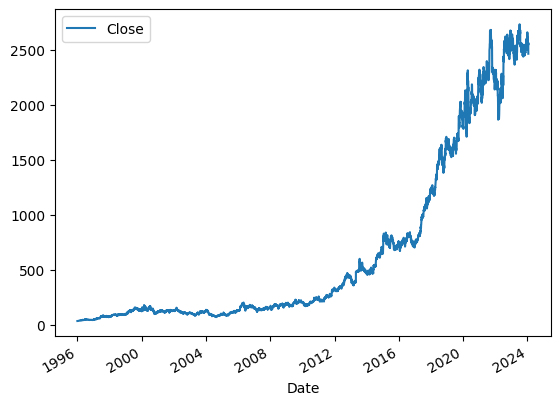

In [190]:
history.plot.line(y="Close",use_index=True)

In [148]:
# Why didnt I buy this! (crying)

In [191]:
# delete unnecessary columns
del history["Dividends"]
del history["Stock Splits"]

# Setting up our TARGET for ML

In [192]:
# creating a column for Tomorrow's Price
history["Tomorrow"]  = history["Close"].shift(-1)

# shifted all prices back one day

In [193]:
history

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1996-01-01 00:00:00+05:30,34.911098,35.121575,34.689396,34.689396,11000,35.059834
1996-01-02 00:00:00+05:30,34.689394,35.191733,34.700620,35.059834,203500,34.852154
1996-01-03 00:00:00+05:30,35.059824,34.995276,34.686578,34.852154,58000,34.854961
1996-01-04 00:00:00+05:30,34.798835,34.967216,34.742709,34.854961,111500,34.798843
1996-01-05 00:00:00+05:30,34.854970,35.023353,34.518208,34.798843,39500,34.812885
...,...,...,...,...,...,...
2024-01-16 00:00:00+05:30,2573.199951,2584.600098,2556.350098,2569.100098,1599406,2562.899902
2024-01-17 00:00:00+05:30,2549.000000,2571.350098,2539.750000,2562.899902,3047652,2548.000000
2024-01-18 00:00:00+05:30,2570.000000,2570.000000,2537.550049,2548.000000,1273095,2565.399902


In [152]:
# boolean indicating if tomorrow's price is greater than today's price

# then converting it to binary data for our model
history["Target"] = (history["Tomorrow"] > history["Close"]).astype(int)

In [194]:
history

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1996-01-01 00:00:00+05:30,34.911098,35.121575,34.689396,34.689396,11000,35.059834
1996-01-02 00:00:00+05:30,34.689394,35.191733,34.700620,35.059834,203500,34.852154
1996-01-03 00:00:00+05:30,35.059824,34.995276,34.686578,34.852154,58000,34.854961
1996-01-04 00:00:00+05:30,34.798835,34.967216,34.742709,34.854961,111500,34.798843
1996-01-05 00:00:00+05:30,34.854970,35.023353,34.518208,34.798843,39500,34.812885
...,...,...,...,...,...,...
2024-01-16 00:00:00+05:30,2573.199951,2584.600098,2556.350098,2569.100098,1599406,2562.899902
2024-01-17 00:00:00+05:30,2549.000000,2571.350098,2539.750000,2562.899902,3047652,2548.000000
2024-01-18 00:00:00+05:30,2570.000000,2570.000000,2537.550049,2548.000000,1273095,2565.399902


In [195]:
# only take data which is relatively naya
history = history.loc["2005-01-01":].copy()

In [196]:
history

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2005-01-03 00:00:00+05:30,96.193105,96.193105,94.932647,95.861404,846383,97.055519
2005-01-04 00:00:00+05:30,96.193096,98.581343,95.629202,97.055519,1777742,95.894562
2005-01-05 00:00:00+05:30,97.387213,98.116948,94.269232,95.894562,1335778,94.103386
2005-01-06 00:00:00+05:30,95.529693,95.695543,92.942435,94.103386,1693246,93.572647
2005-01-07 00:00:00+05:30,93.705325,95.529677,93.240947,93.572647,731186,94.700447
...,...,...,...,...,...,...
2024-01-16 00:00:00+05:30,2573.199951,2584.600098,2556.350098,2569.100098,1599406,2562.899902
2024-01-17 00:00:00+05:30,2549.000000,2571.350098,2539.750000,2562.899902,3047652,2548.000000
2024-01-18 00:00:00+05:30,2570.000000,2570.000000,2537.550049,2548.000000,1273095,2565.399902


# Training an initial Machine Learning Model

In [156]:
from sklearn.ensemble import RandomForestClassifier


# work by training randomparameters and average out.
# resistant to overfitting
# can pick up non-linear tendencies in the data

# for example open price is not linearly related with the target
                              # higher --> better  , optimum  ,
model = RandomForestClassifier(n_estimators=1000,min_samples_split = 100,random_state = 1)


# splitting data

# all rows till 100 in the trauning set
train = history.iloc[:-100]



# last hundred rows in the test set
test = history.iloc[-100:]




predictors = ["Close","Volume","Open","High","Low"]

model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=1)

In [157]:
from sklearn.metrics import precision_score


# exam time!


preds = model.predict(test[predictors])

In [158]:
import pandas as pd
preds = pd.Series(preds,index=test.index)

In [159]:
precision_score(test["Target"],preds)

0.5882352941176471

# Making the Model Better

In [160]:
combined  = pd.concat([test["Target"],preds],axis=1)

<Axes: xlabel='Date'>

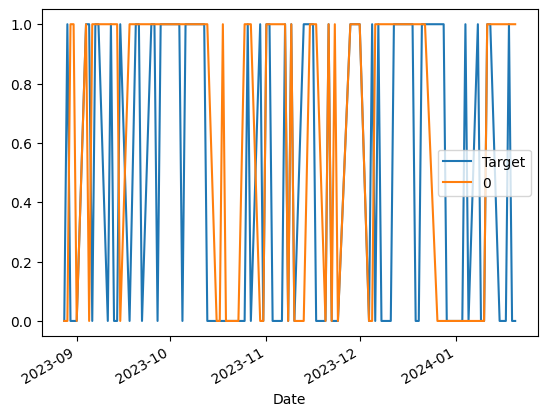

In [161]:
combined.plot()

# Building a BackTesting System

In [162]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [163]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)
  

In [164]:
predictions = backtest(history, model, predictors)

In [165]:
if 'Predictions' in predictions.columns:
    print(predictions["Predictions"].value_counts())
else:
    print("The 'Predictions' column does not exist in the DataFrame.")


Predictions
0    1615
1     589
Name: count, dtype: int64


In [166]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5161290322580645

In [167]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.500454
0    0.499546
Name: count, dtype: float64

# Adding Additional Predictors to our Model

In [198]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_average = history.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    history[ratio_column] = history["Close"] / rolling_average["Close"]


    trend_column = f"Trend_{horizon}"
    history[trend_column] = history.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

KeyError: 'Target'

In [169]:
history

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2005-01-03 00:00:00+05:30,96.193105,96.193105,94.932647,95.861404,846383,97.055496,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04 00:00:00+05:30,96.193074,98.581319,95.629179,97.055496,1777742,95.894577,0,1.006190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05 00:00:00+05:30,97.387229,98.116963,94.269247,95.894577,1335778,94.103378,0,0.993983,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-06 00:00:00+05:30,95.529686,95.695536,92.942427,94.103378,1693246,93.572662,0,0.990573,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-07 00:00:00+05:30,93.705340,95.529692,93.240962,93.572662,731186,94.700432,1,0.997172,0.0,0.981900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-16 00:00:00+05:30,2573.199951,2584.600098,2556.350098,2569.100098,1599406,2562.899902,0,0.999203,1.0,1.003563,2.0,1.013749,30.0,1.012862,122.0,1.115965,487.0
2024-01-17 00:00:00+05:30,2549.000000,2571.350098,2539.750000,2562.899902,3047652,2548.000000,0,0.998792,0.0,1.002276,2.0,1.011081,30.0,1.010403,122.0,1.112897,486.0
2024-01-18 00:00:00+05:30,2570.000000,2570.000000,2537.550049,2548.000000,1273095,2565.399902,1,0.997085,0.0,0.995530,2.0,1.004734,30.0,1.004533,122.0,1.106067,485.0


# Improving our Model

In [199]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [201]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [203]:
prediction = backtest(history, model, new_predictors)


KeyError: 'Target'

In [ ]:
predictions["Predictions"].value_counts()